In [1]:
### importation of important libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
cancer_data = pd.read_csv('Breast_cancer_data.csv')
cancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Exploradata analysis

In [3]:
cancer_data.shape

(569, 6)

In [4]:
cancer_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
cancer_data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [6]:
cancer_data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [7]:
cancer_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [8]:
cancer_data['diagnosis'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

## Visualiations

<AxesSubplot:title={'center':'Distriution of Diagnosis'}>

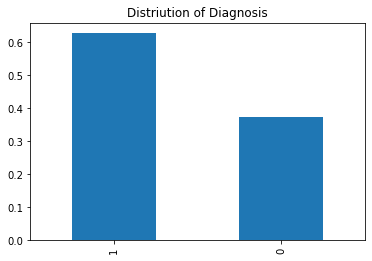

In [9]:
cancer_data['diagnosis'].value_counts(normalize=True).plot.bar(figsize=(6, 4), title = 'Distriution of Diagnosis')

## Distribution of univariate data


In [10]:
features = cancer_data.drop('diagnosis', 1)

array([[<AxesSubplot:title={'center':'mean_radius'}>,
        <AxesSubplot:title={'center':'mean_texture'}>],
       [<AxesSubplot:title={'center':'mean_perimeter'}>,
        <AxesSubplot:title={'center':'mean_area'}>],
       [<AxesSubplot:title={'center':'mean_smoothness'}>, <AxesSubplot:>]],
      dtype=object)

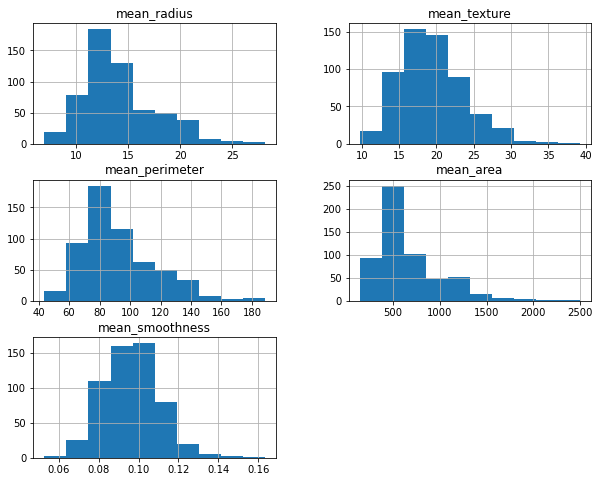

In [11]:
features.hist(figsize=(10, 8))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

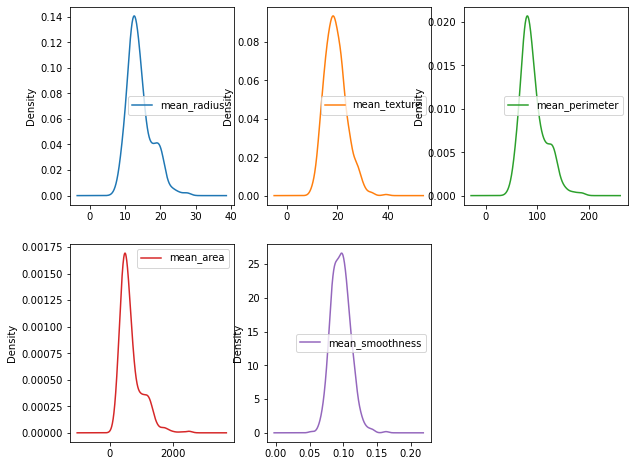

In [12]:
features.plot(kind='density', layout =(2,3), subplots=True, sharex=False, figsize = (10, 8))

## visualizing scatter plots using box plots

mean_radius           AxesSubplot(0.125,0.657941;0.352273x0.222059)
mean_texture       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
mean_perimeter        AxesSubplot(0.125,0.391471;0.352273x0.222059)
mean_area          AxesSubplot(0.547727,0.391471;0.352273x0.222059)
mean_smoothness          AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

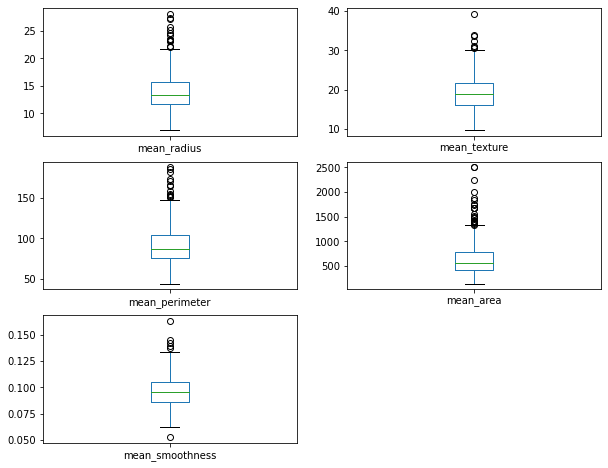

In [13]:
features.plot(kind='box', layout =(3,2), subplots=True, sharex=False, figsize = (10, 8))

## removing outliers using Z score

In [14]:
from scipy import stats

In [15]:
z = np.abs(stats.zscore(cancer_data))
print(z)

[[1.09706398 2.07333501 1.26993369 0.9843749  1.56846633 1.29767572]
 [1.82982061 0.35363241 1.68595471 1.90870825 0.82696245 1.29767572]
 [1.57988811 0.45618695 1.56650313 1.55888363 0.94221044 1.29767572]
 ...
 [0.70228425 2.0455738  0.67267578 0.57795264 0.84048388 1.29767572]
 [1.83834103 2.33645719 1.98252415 1.73521799 1.52576706 1.29767572]
 [1.80840125 1.22179204 1.81438851 1.34778924 3.11208479 0.77060855]]


In [16]:
threshold = 3
print(np.where(z>3))

(array([  3,  82,  82,  82, 105, 122, 122, 122, 180, 180, 180, 212, 212,
       212, 219, 232, 239, 259, 339, 352, 352, 352, 461, 461, 461, 504,
       521, 521, 568], dtype=int64), array([4, 0, 2, 3, 4, 2, 3, 4, 0, 2, 3, 0, 2, 3, 1, 1, 1, 1, 3, 0, 2, 3,
       0, 2, 3, 4, 2, 3, 4], dtype=int64))


In [17]:
features_no_outlier = cancer_data[(z<2).all(axis=1)]

In [18]:
features_no_outlier.shape

(501, 6)

mean_radius           AxesSubplot(0.125,0.657941;0.352273x0.222059)
mean_texture       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
mean_perimeter        AxesSubplot(0.125,0.391471;0.352273x0.222059)
mean_area          AxesSubplot(0.547727,0.391471;0.352273x0.222059)
mean_smoothness          AxesSubplot(0.125,0.125;0.352273x0.222059)
diagnosis             AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

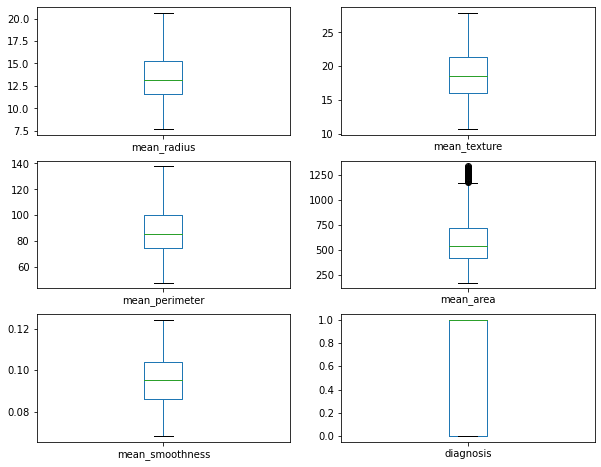

In [19]:
features_no_outlier.plot(kind='box', layout =(3,2), subplots=True, sharex=False, figsize = (10, 8))

## multivariate data analysis

## correlation matrix

In [20]:
matrix = features_no_outlier.corr()

<AxesSubplot:>

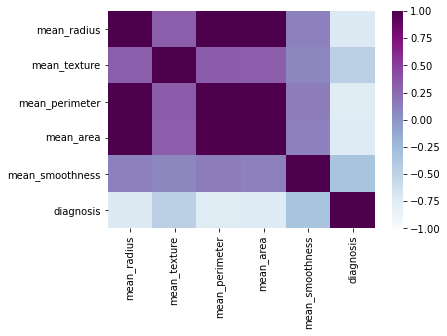

In [21]:
fig = plt.figure(figsize = (6, 4))
sn.heatmap(matrix, vmax=1, vmin=-1, cmap='BuPu')

In [22]:
features_no_outlier.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,13.713621,18.770559,89.028563,607.650699,0.095463,0.664671
std,2.956605,3.612943,20.199364,271.503439,0.012269,0.472577
min,7.691000,10.720000,47.980000,170.400000,0.068280,0.000000
25%,11.620000,16.070000,74.520000,412.600000,0.086370,0.000000
50%,13.170000,18.590000,85.240000,537.300000,0.095160,1.000000
75%,15.270000,21.310000,100.200000,716.600000,0.104200,1.000000
max,20.640000,27.880000,137.800000,1335.000000,0.124300,1.000000


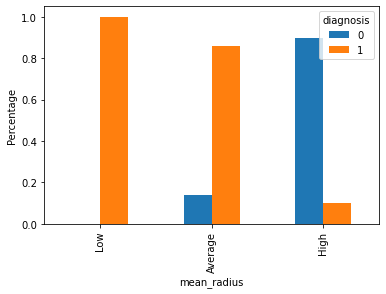

In [23]:
bins=[0,10,15,20] 
group=['Low','Average','High'] 
features_no_outlier['mean_radius_bin']=pd.cut(features_no_outlier['mean_radius'],bins,labels=group)

mean_radius_bin=pd.crosstab(features_no_outlier['mean_radius_bin'],features_no_outlier['diagnosis']) 
mean_radius_bin.div(mean_radius_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_radius') 
P = plt.ylabel('Percentage')

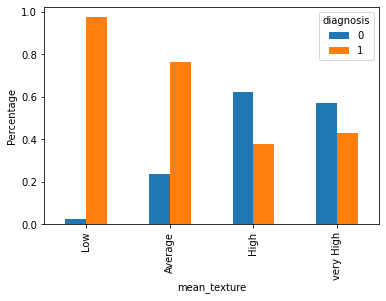

In [24]:
bins=[0,15,20,25, 30] 
group=['Low','Average','High', 'very High'] 
features_no_outlier['mean_texture_bin']=pd.cut(features_no_outlier['mean_texture'],bins,labels=group)

mean_texture_bin=pd.crosstab(features_no_outlier['mean_texture_bin'],features_no_outlier['diagnosis']) 
mean_texture_bin.div(mean_texture_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_texture') 
P = plt.ylabel('Percentage')

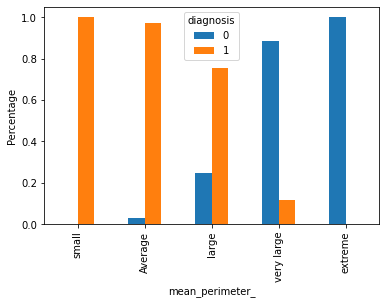

In [25]:
bins=[0,60,80,100, 120, 140] 
group=['small','Average','large','very large', 'extreme'] 
features_no_outlier['mean_perimeter_bin']=pd.cut(features_no_outlier['mean_perimeter'],bins,labels=group)

mean_perimeter_bin=pd.crosstab(features_no_outlier['mean_perimeter_bin'],features_no_outlier['diagnosis']) 
mean_perimeter_bin.div(mean_perimeter_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_perimeter_') 
P = plt.ylabel('Percentage')

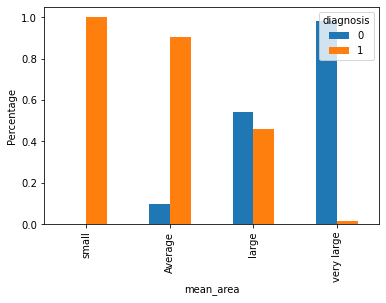

In [26]:
bins=[0,300,600,900, 1200] 
group=['small','Average','large','very large'] 
features_no_outlier['mean_area_bin']=pd.cut(features_no_outlier['mean_area'],bins,labels=group)

mean_area_bin=pd.crosstab(features_no_outlier['mean_area_bin'],features_no_outlier['diagnosis']) 
mean_area_bin.div(mean_area_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 
plt.xlabel('mean_area') 
P = plt.ylabel('Percentage')

In [27]:
features_no_outlier = features_no_outlier.drop(['mean_radius_bin','mean_perimeter_bin','mean_texture_bin', 'mean_area_bin'], axis=1)

# Model Building

### feature selection


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# create feature union
features = []
features.append(('pca', PCA(n_components=5)))
features.append(('select_best', SelectKBest(k=5)))
feature_union = FeatureUnion(features)

In [29]:
X = features_no_outlier.drop('diagnosis', 1)
y = features_no_outlier.diagnosis


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Training Logistic regression

In [30]:
LR = LogisticRegression()
LR_model = LR.fit(X_train, y_train)

In [31]:
print('Training Acuracy: {:.3f}'.format(LR_model.score(X_train, y_train)))
print('Testing Acuracy: {:.3f}'.format(LR_model.score(X_test, y_test)))

Training Acuracy: 0.903
Testing Acuracy: 0.927


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_pred = LR_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[46, 10],
       [ 1, 94]], dtype=int64)

In [34]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        56
           1       0.90      0.99      0.94        95

    accuracy                           0.93       151
   macro avg       0.94      0.91      0.92       151
weighted avg       0.93      0.93      0.93       151



In [35]:
import yellowbrick
from yellowbrick.model_selection import FeatureImportances 
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.classifier import ROCAUC

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
visualizer = FeatureImportances(LR_model)
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
visualizer = ROCAUC(LR_model)
visualizer.fit(X_train, y_train) # Fit the data to the visualizer
visualizer.score(X_test, y_test)
visualizer.show()

#### Training Support Vector Machines

In [ ]:
SVM = SVC()
SVM_model = SVM.fit(X_train, y_train)

In [ ]:
print('Training Acuracy: {:.3f}'.format(SVM_model.score(X_train, y_train)))
print('Testing Acuracy: {:.3f}'.format(SVM_model.score(X_test, y_test)))

In [ ]:
y_pred = SVM_model.predict(X_test)

confusion_matrix(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
naive = GaussianNB()
naive_model = naive.fit(X_train, y_train)

In [ ]:
print('Training Acuracy: {:.3f}'.format(naive_model.score(X_train, y_train)))
print('Testing Acuracy: {:.3f}'.format(naive_model.score(X_test, y_test)))

In [ ]:
visualizer = ROCAUC(naive_model)
visualizer.fit(X_train, y_train) # Fit the data to the visualizer
visualizer.score(X_test, y_test)
visualizer.show()

### Random Forest

In [ ]:
RF = RandomForestClassifier(max_depth=4)
RF_model = RF.fit(X_train, y_train)

In [ ]:
print('Training Acuracy: {:.3f}'.format(RF_model.score(X_train, y_train)))
print('Testing Acuracy: {:.3f}'.format(RF_model.score(X_test, y_test)))

In [ ]:
y_pred = RF_model.predict(X_test)

confusion_matrix(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
visualizer = FeatureImportances(RF_model)
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
visualizer = ROCAUC(RF_model)
visualizer.fit(X_train, y_train) # Fit the data to the visualizer
visualizer.score(X_test, y_test)
visualizer.show()